In [1]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [2]:
from Time import *
from Load import *

In [3]:
datat2.keys()

Index(['HIratio', 'Pram', 'Prest', 'Rvir', 'SNHfrac', 'env_rho', 'fHI',
       'gasfrac', 'gtemp', 'h1dist', 'haloid', 'inflow_23', 'inflow_91',
       'inflow_temp_23', 'inflow_temp_91', 'mHI', 'mass', 'mgas', 'mstar',
       'outflow_23', 'outflow_91', 'outflow_temp_23', 'outflow_temp_91',
       'ratio', 'sfr', 'time', 'v_env', 'v_halo', 'v_halo1', 'z0haloid'],
      dtype='object')

In [38]:
datat1['haloid'][datat1['outflow_23']>0]

0         2.0
1         3.0
2         4.0
3         6.0
4         7.0
5        10.0
6        11.0
7        12.0
8        13.0
9        15.0
10       21.0
11       23.0
12       27.0
13       28.0
14       29.0
16       34.0
21       48.0
53        2.0
54        3.0
55        4.0
56        5.0
57        7.0
58        9.0
59       11.0
60       12.0
61       13.0
62       16.0
63       20.0
64       23.0
65       25.0
        ...  
1689    436.0
1690    331.0
1693    251.0
1694    204.0
1695     91.0
1696    249.0
1698    297.0
1699    176.0
1700    312.0
1702    213.0
1703     97.0
1704    250.0
1705     34.0
1706    274.0
1707    100.0
1708    303.0
1709    223.0
1710    252.0
1711     84.0
1712    144.0
1713    168.0
1714    291.0
1715    197.0
1716    234.0
1717    415.0
1718    244.0
1719    523.0
1730    372.0
1756    466.0
1763     11.0
Name: haloid, Length: 1189, dtype: float64

In [34]:
def cumulative_sfh(halo_num):
    age = 13.800797497330507
    s = pynbody.load('/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.004096')
    halo = s.halos()[halo_num]
    try:
        sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=False, clear=False, legend=False, subplot=False, trange=False, bins=128)
        plt.clf()
    except ValueError:
        print(f'Cannot create SFH, only {len(halo.s)} star particles')
        raise

    sfhmstar = np.sum(sfh)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    c_sfh = np.empty(shape=sfh.shape)
    for i in range(len(bincenters)):
        c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar 
    return c_sfh, bincenters

In [35]:
i = 2
#c_sfh, lookback = cumulative_sfh(i)
c_sfh, time = cumulative_sfh(i)

<Figure size 432x288 with 0 Axes>

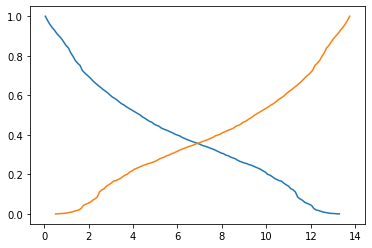

In [36]:
plt.plot(lookback, c_sfh)
plt.plot(time, c_sfh)
#plt.xlim(14, 0)

<Figure size 504x360 with 0 Axes>

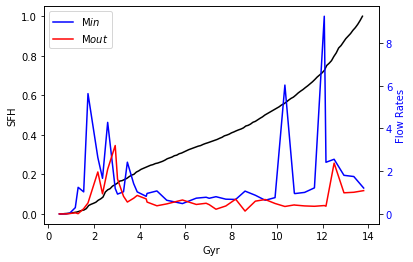

<Figure size 504x360 with 0 Axes>

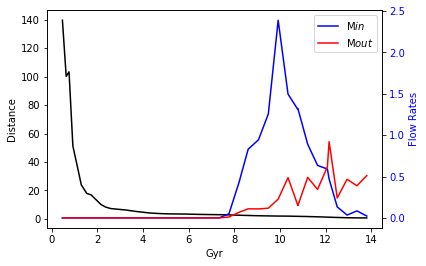

In [37]:
plt.figure(figsize=(7,5))

i = 2

fig, ax1 = plt.subplots()

ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, c_sfh, c='black')
#Find a way to flip
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow Rates', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))

fig, ax1 = plt.subplots()

ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow Rates', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

In [12]:
i = 48
halo = h3.load_copy(i)

ValueError: `bins` must increase monotonically, when an array

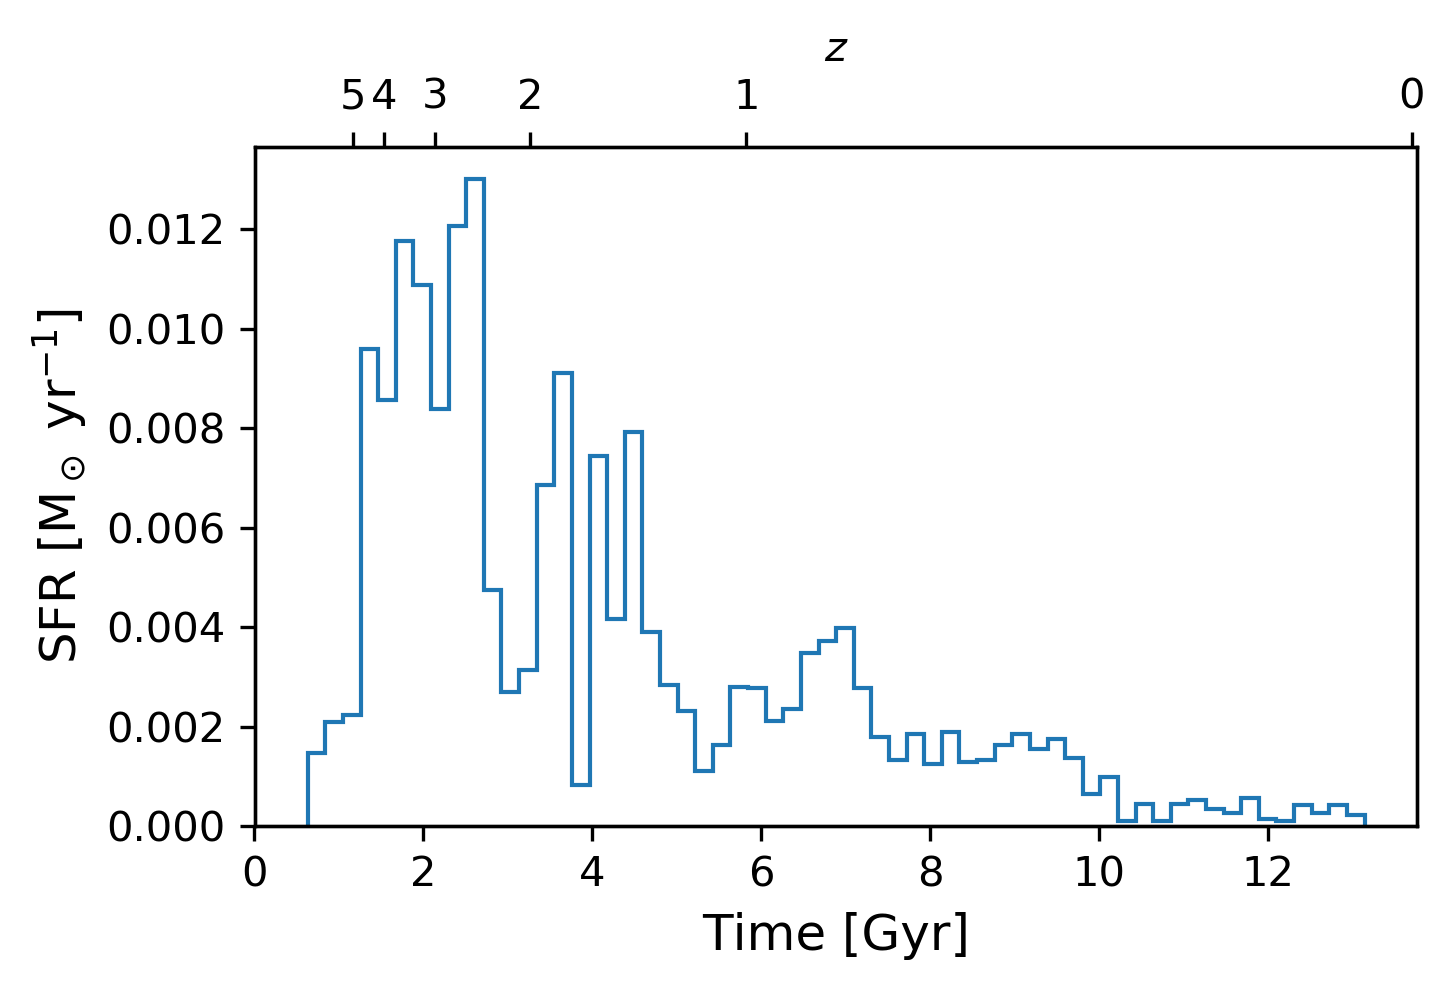

In [13]:
plt.figure(figsize=(5,3), dpi=300)
sfr, timeax = pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)

plt.hist(timeax, sfr)

plt.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i])*5e-2, c='blue', label=r'M${in}$')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i]*5e-2, c='red', label=r'M${out}$')
plt.show()

plt.figure(figsize=(5,3), dpi=300)
pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)
plt.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i])*10, c='blue', label=r'M${in}$')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i]*10, c='red', label=r'M${out}$')
plt.show()

plt.hist(sfr, bins=timeax)
plt.show()

In [48]:
timeax

SimArray([ 0.41767718,  0.61630363,  0.81493009,  1.01355654,  1.21218299,
           1.41080945,  1.6094359 ,  1.80806235,  2.00668881,  2.20531526,
           2.40394172,  2.60256817,  2.80119462,  2.99982108,  3.19844753,
           3.39707398,  3.59570044,  3.79432689,  3.99295334,  4.1915798 ,
           4.39020625,  4.58883271,  4.78745916,  4.98608561,  5.18471207,
           5.38333852,  5.58196497,  5.78059143,  5.97921788,  6.17784434,
           6.37647079,  6.57509724,  6.7737237 ,  6.97235015,  7.1709766 ,
           7.36960306,  7.56822951,  7.76685597,  7.96548242,  8.16410887,
           8.36273533,  8.56136178,  8.75998823,  8.95861469,  9.15724114,
           9.35586759,  9.55449405,  9.7531205 ,  9.95174696, 10.15037341,
          10.34899986, 10.54762632, 10.74625277, 10.94487922, 11.14350568,
          11.34213213, 11.54075859, 11.73938504, 11.93801149, 12.13663795,
          12.3352644 ], 'Gyr')

In [32]:
i = 35
halo = h3.load_copy(i)

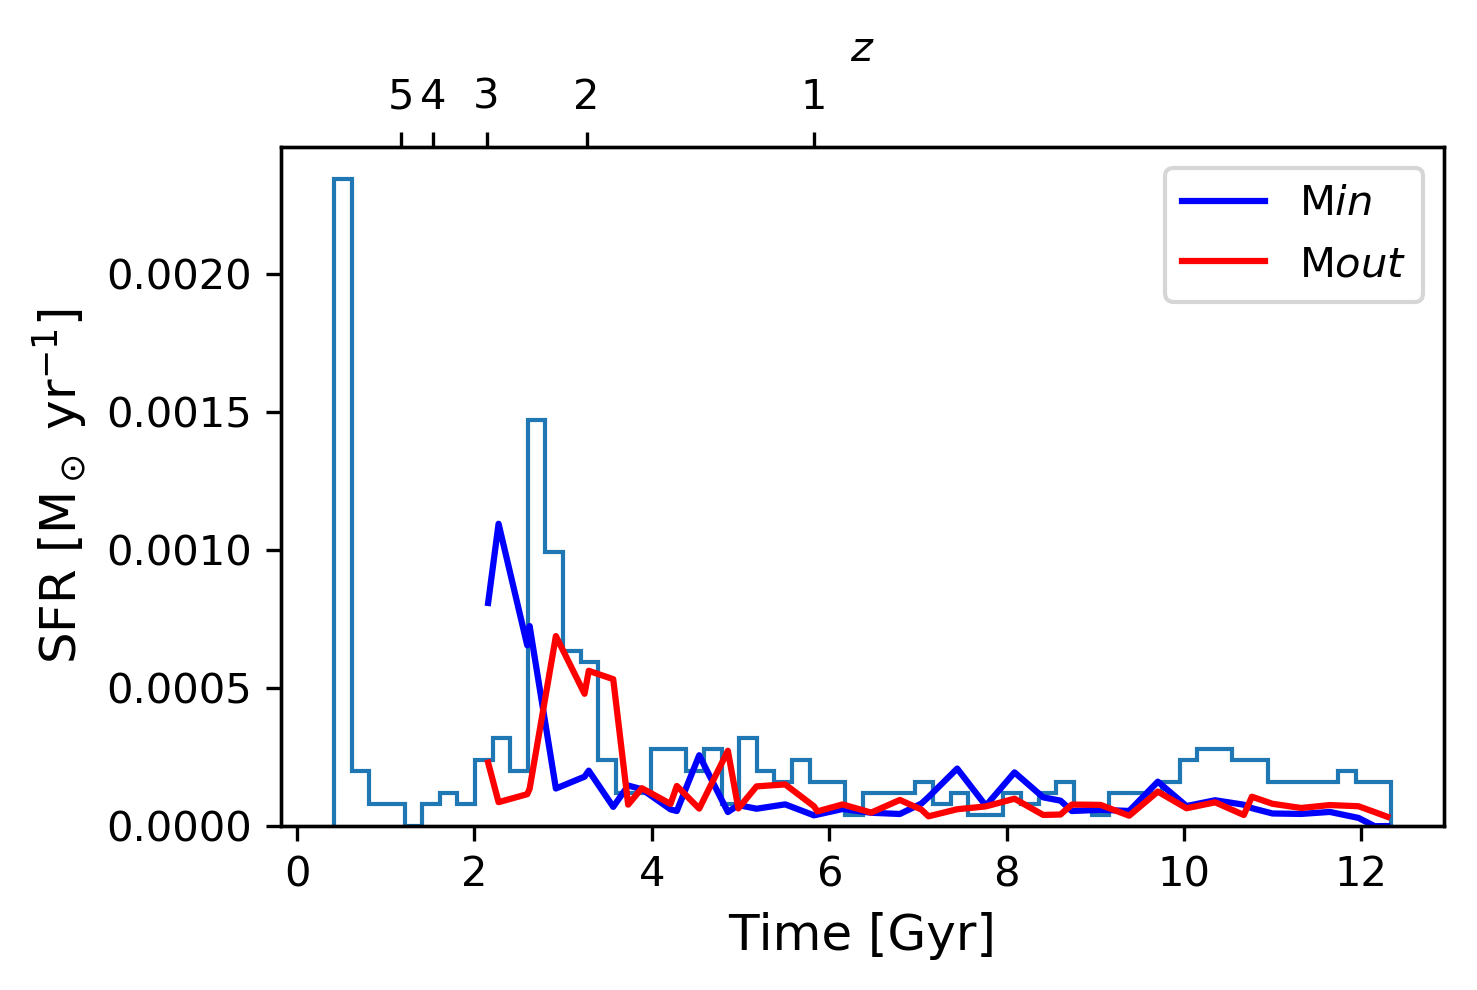

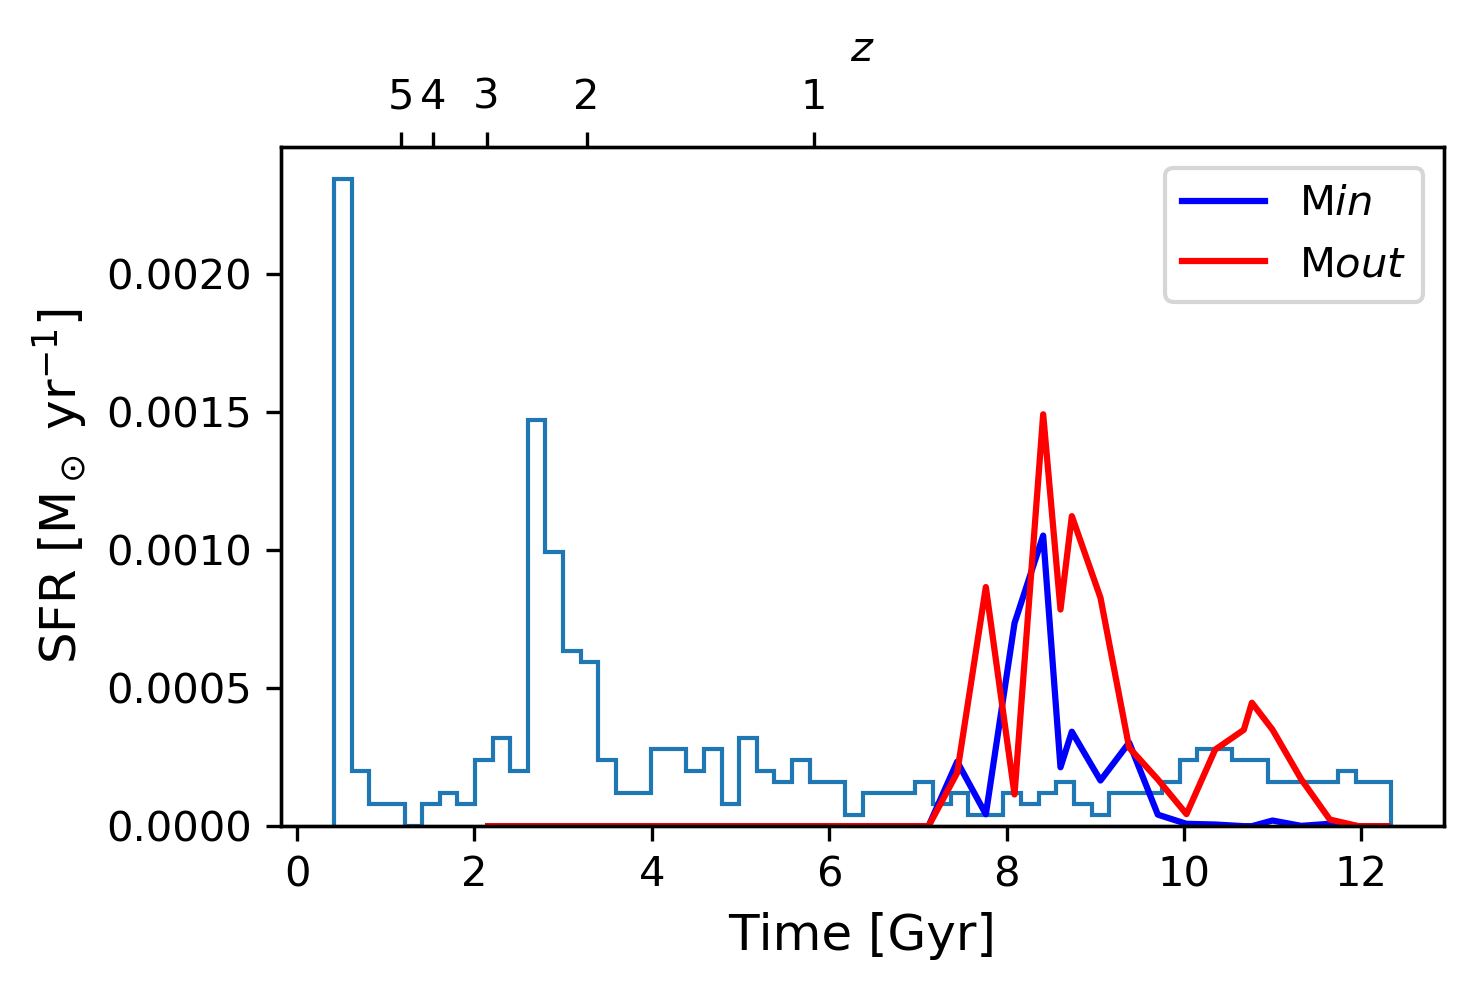

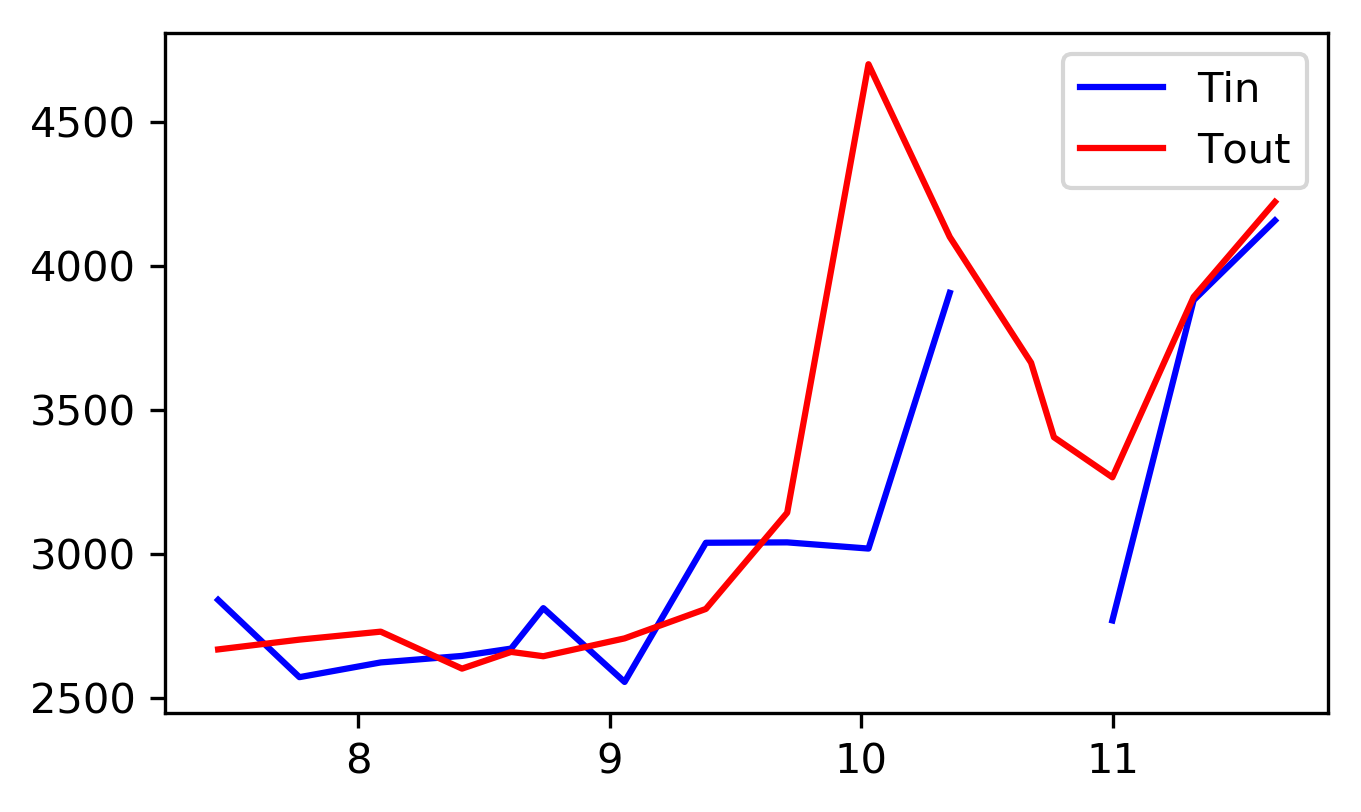

In [41]:
plt.figure(figsize=(5,3), dpi=300)
pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)
plt.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i])*1e-2, c='blue', label=r'M${in}$')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i]*1e-2, c='red', label=r'M${out}$')
plt.legend()
plt.show()

plt.figure(figsize=(5,3), dpi=300)
pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)
plt.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i])*1e-1, c='blue', label=r'M${in}$')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i]*1e-1, c='red', label=r'M${out}$')
plt.legend()
plt.show()

plt.figure(figsize=(5,3), dpi=300)
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['inflow_temp_91'][datat3['z0haloid']==i]*1e-1, c='b', label='Tin')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i]*1e-1, c='red', label='Tout')
plt.legend()


In [26]:
#48, 35, 31

i = 31
halo = h3.load_copy(i)
halo.physical_units()

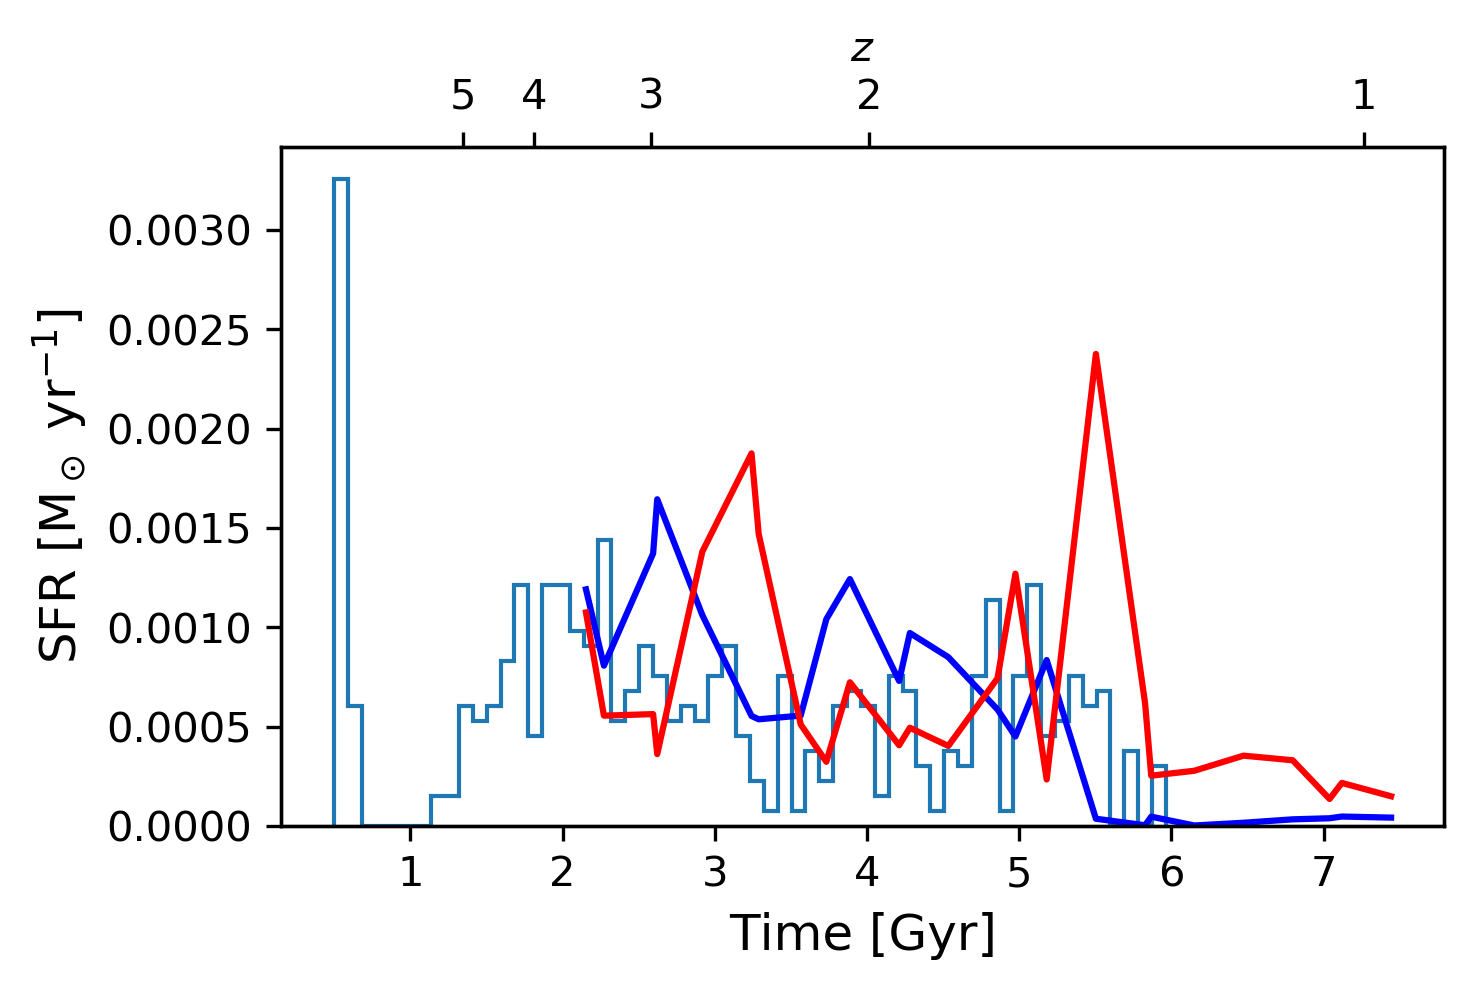

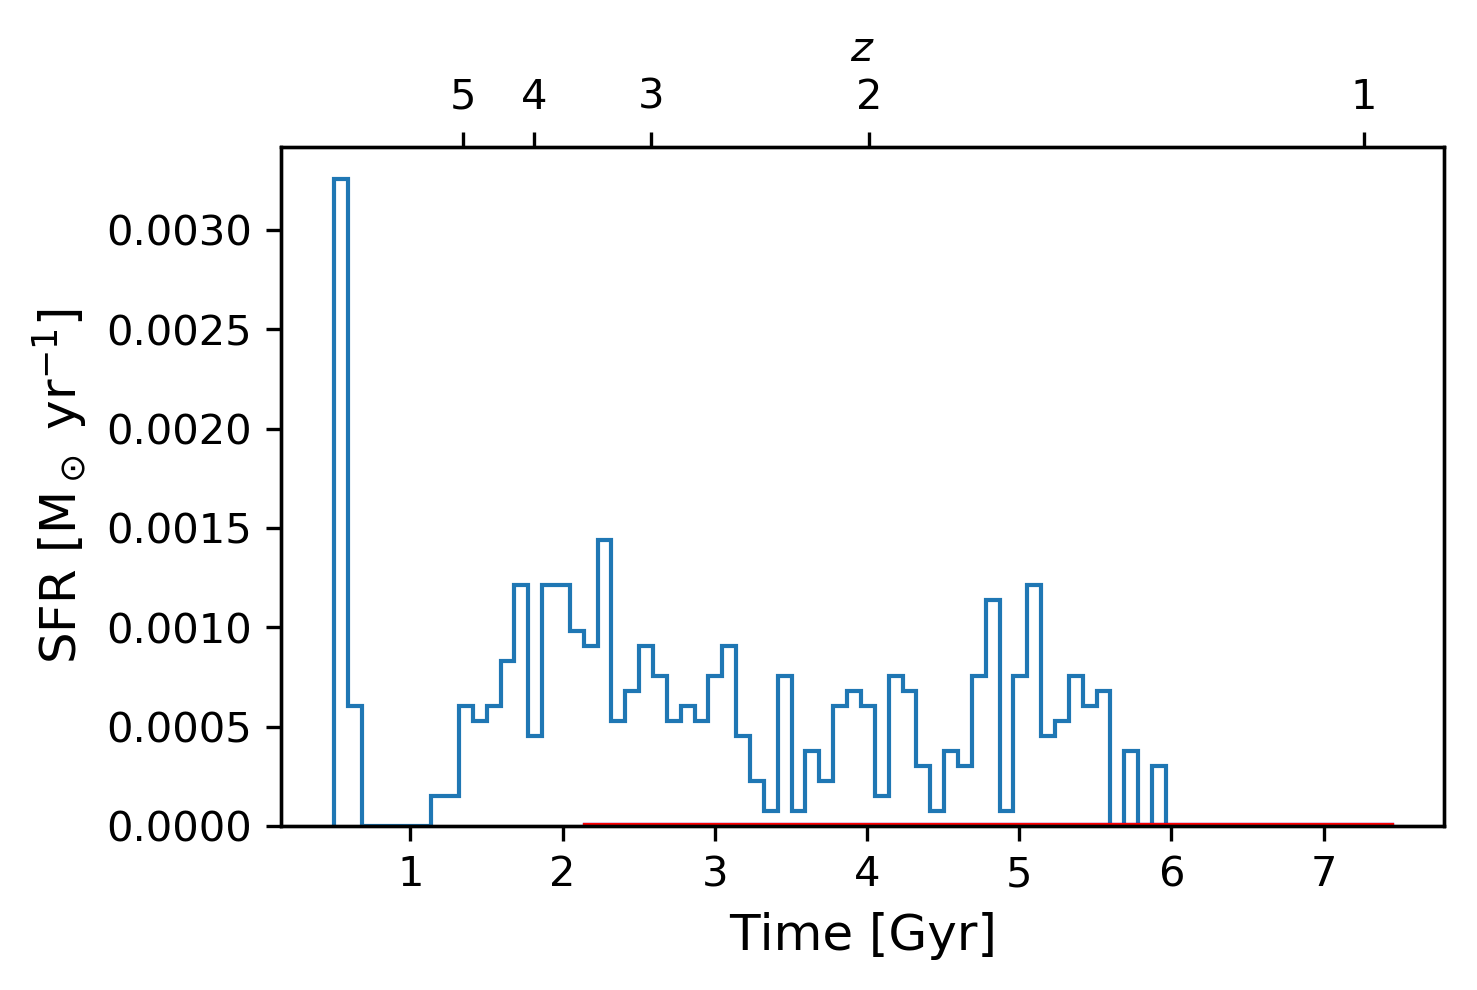

In [27]:
plt.figure(figsize=(5,3), dpi=300)
pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)
plt.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i])*5e-2, c='blue', label=r'M${in}$')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i]*5e-2, c='red', label=r'M${out}$')
plt.show()

plt.figure(figsize=(5,3), dpi=300)
pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)
plt.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i])*10, c='blue', label=r'M${in}$')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i]*10, c='red', label=r'M${out}$')
plt.show()

In [8]:
i = 21
halo = h3.load_copy(i)

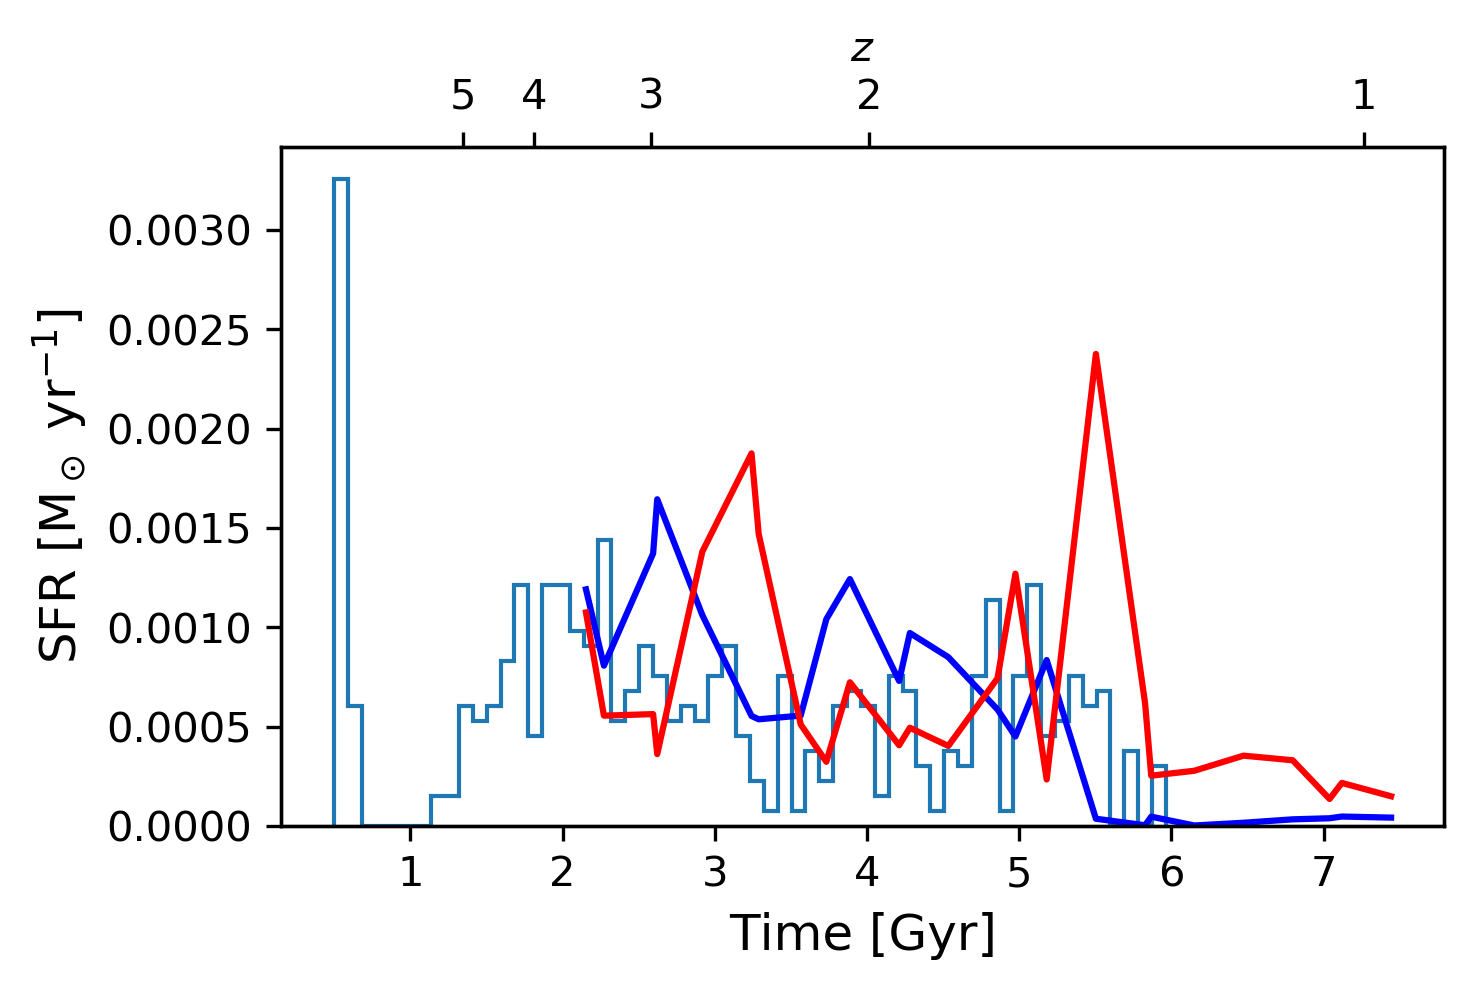

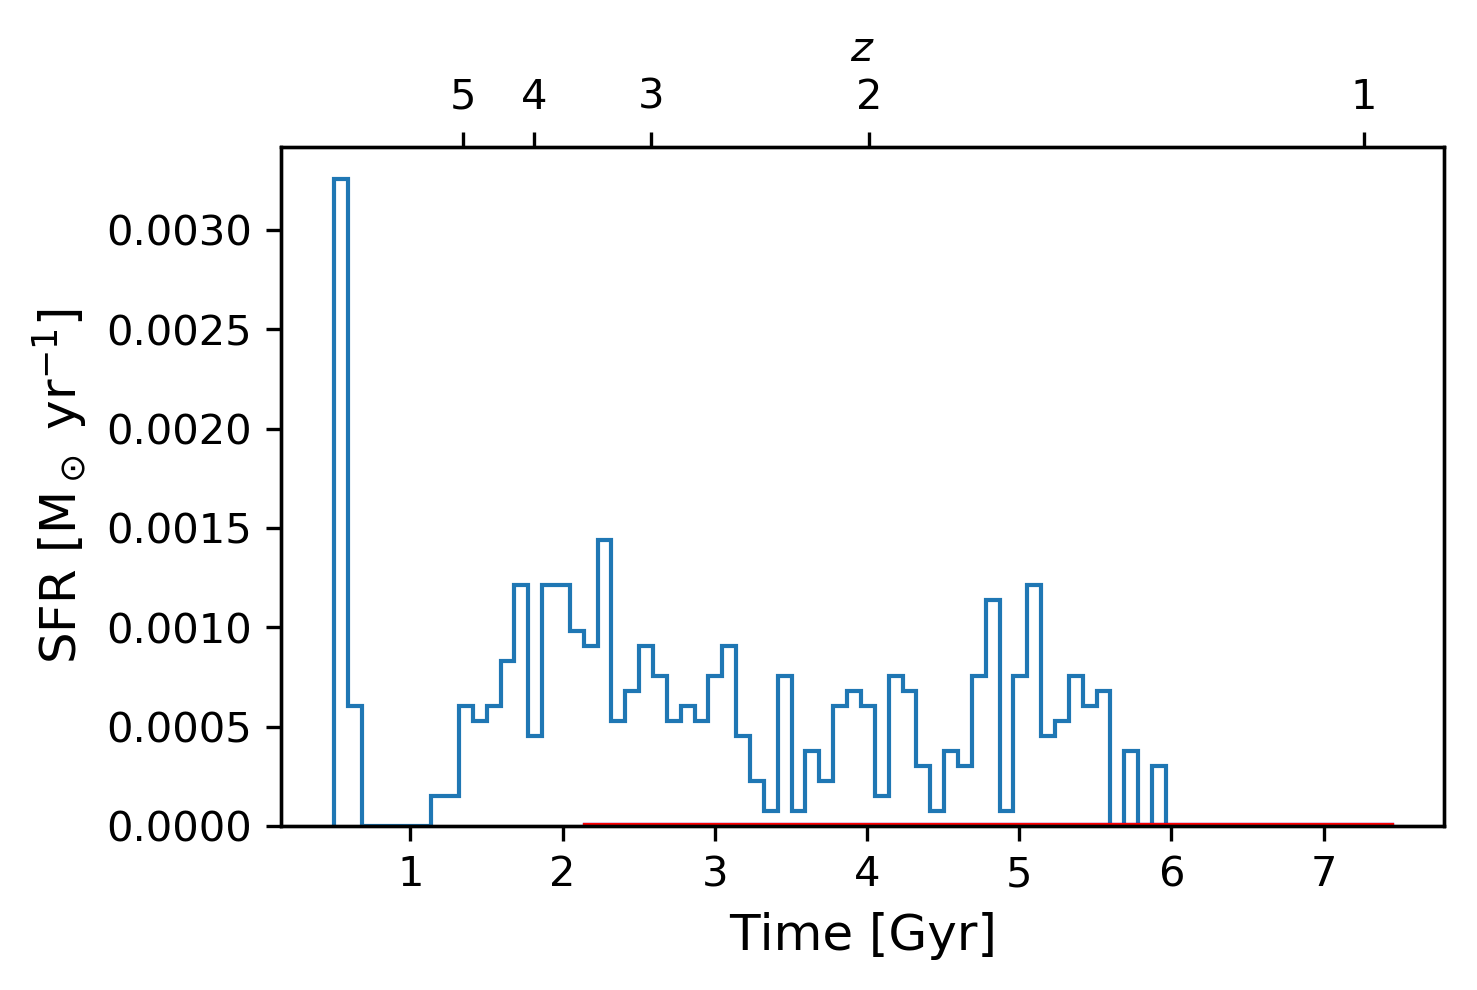

In [29]:
plt.figure(figsize=(5,3), dpi=300)
#sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)
pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)
plt.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i])*5e-2, c='blue', label=r'M${in}$')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i]*5e-2, c='red', label=r'M${out}$')
plt.show()

plt.figure(figsize=(5,3), dpi=300)
pynbody.plot.stars.sfh(halo, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=60)
plt.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i])*10, c='blue', label=r'M${in}$')
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i]*10, c='red', label=r'M${out}$')
plt.show()

In [ ]:
plt.figure(figsize=(7,5))

fig, ax1 = plt.subplots()

ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(time, distance, c='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow Rates', color='b')  # we already handled the x-label with ax1
ax2.plot(time, np.abs(Gin2), c='blue', label=r'M${in}$')
ax2.plot(time, Gout2, c='red', label=r'M${out}$')
ax2.tick_params(axis='y', labelcolor='b')

(0, 17.5)

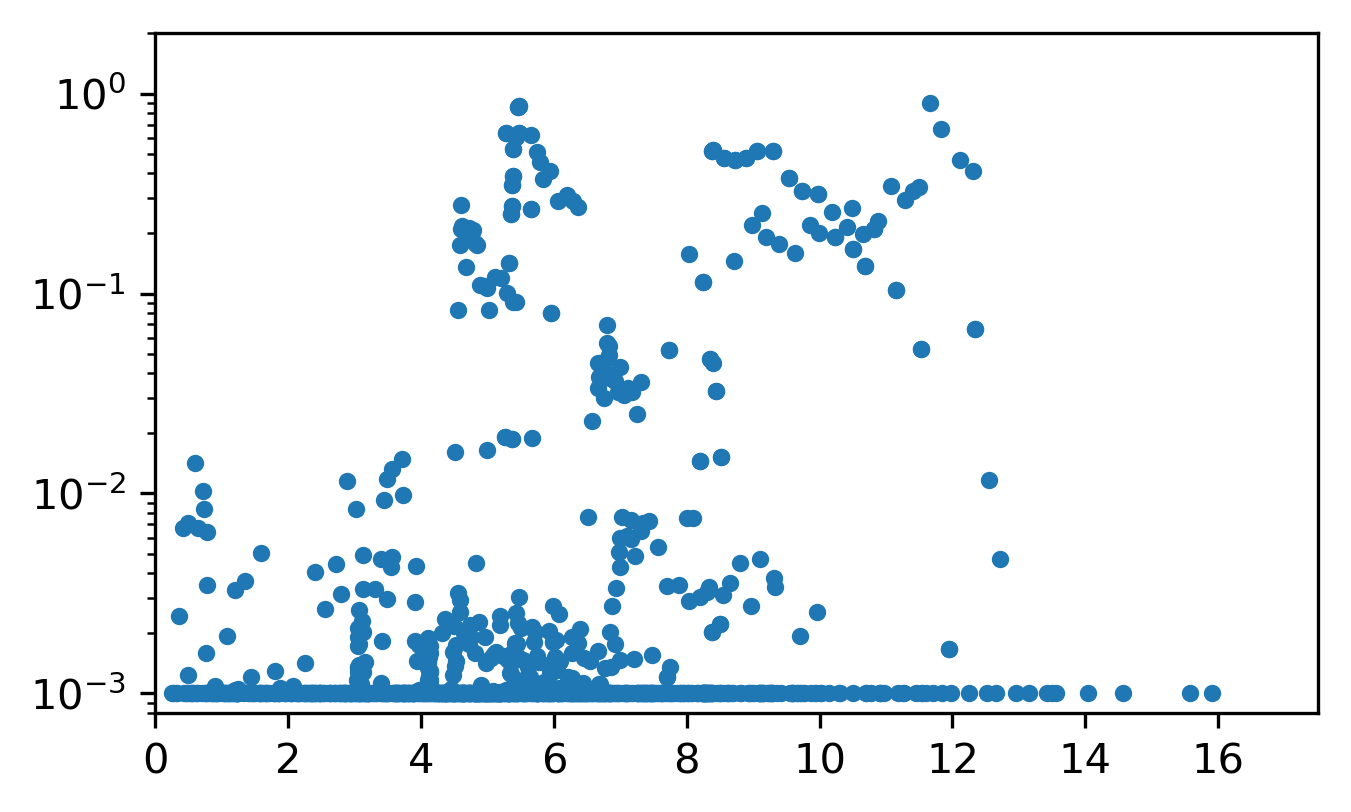

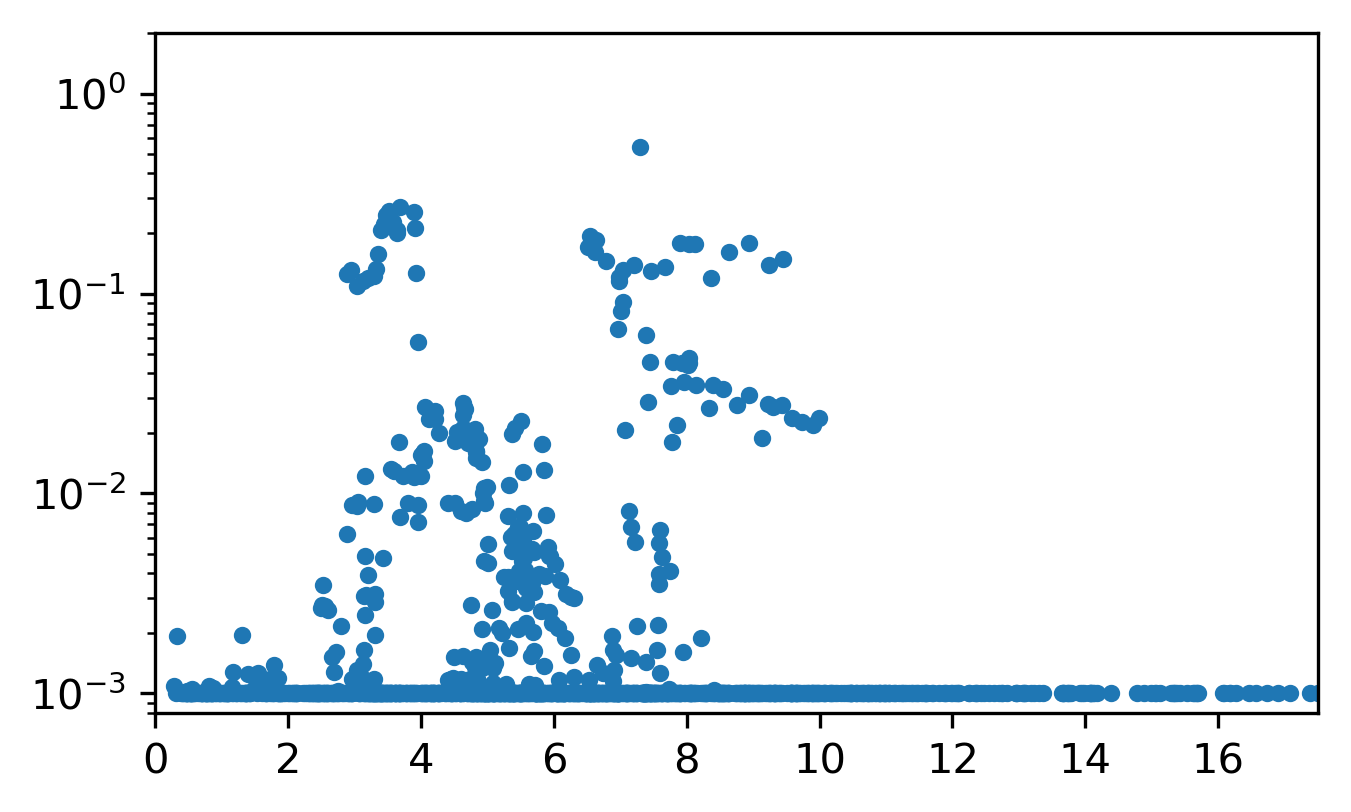

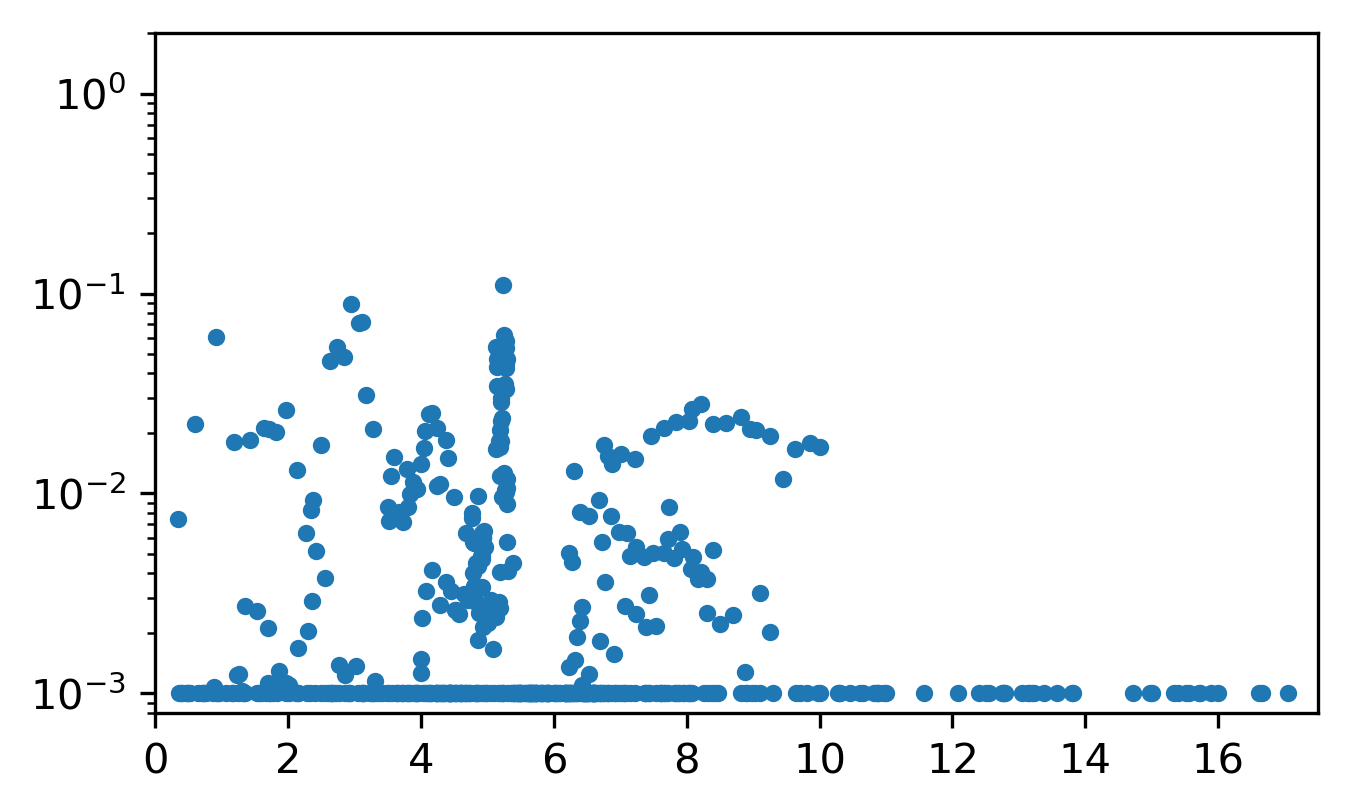

In [29]:
plt.figure(figsize=(5,3), dpi=300)
plt.scatter(datat3['h1dist'], abs(datat3['inflow_91'])+.001, s=10)
plt.semilogy()
plt.ylim(8e-4, 2)
plt.xlim(0, 17.5)

plt.figure(figsize=(5,3), dpi=300)
plt.scatter(datat2['h1dist'], abs(datat2['inflow_91'])+.001, s=10)
plt.semilogy()
plt.ylim(8e-4, 2)
plt.xlim(0, 17.5)

plt.figure(figsize=(5,3), dpi=300)
plt.scatter(datat4['h1dist'], abs(datat4['inflow_91'])+.001, s=10)
plt.semilogy()
plt.ylim(8e-4, 2)
plt.xlim(0, 17.5)

In [9]:
datat3['haloid']

0         4.0
1         7.0
2        10.0
3        11.0
4        12.0
5        20.0
6        21.0
7        27.0
8        31.0
9        35.0
10       36.0
11       37.0
12       45.0
13       47.0
14       48.0
15       49.0
16       59.0
17       64.0
18       65.0
19       67.0
20       68.0
21       70.0
22       71.0
23       77.0
24       81.0
25       90.0
26      100.0
27      102.0
28      131.0
29      137.0
        ...  
1465    114.0
1466     65.0
1467     41.0
1468     77.0
1469    822.0
1470    107.0
1471     22.0
1472     15.0
1473     24.0
1474     40.0
1475     38.0
1476     43.0
1477     47.0
1478     62.0
1479     17.0
1480     78.0
1481    209.0
1482     41.0
1483     52.0
1484    189.0
1485    115.0
1486     49.0
1487     56.0
1488    153.0
1489    157.0
1490    113.0
1491    331.0
1492    189.0
1493     95.0
1494     77.0
Name: haloid, Length: 1495, dtype: float64